# Classification metrics

Measuring model performance with accuracy:

* Fraction of correctly classified samples
* Not always a useful metric

**Class imbalance example: Emails**

Spam classification
* 99% of emails are real; 1% of emails are spam
* Could build a classifier that predicts ALL emails as real
* 99% accurate!

But horrible at actually classifying spam

* Fails at its original purpose
* Need more nuanced metrics

<font color='blue'> A classifier which classifies all emails as real has 99% accuracy but fails each time a spam is recieved !</font>.

![](https://drive.google.com/uc?export=view&id=1Bws_Zq1HGhvmX_IKlAALBVif5oEBVFt7) 

# Metrics from the confusion matrix

* Precision : $\frac{tp}{tp+fp}$

* Recall : $\frac{tp}{tp+fn}$

* $F1$ score: $2 . \frac{\text{Precision} . \text{Recall}}{\text{Precision}+\text{Recall}}=\frac{tp}{tp+0.5(fp+fn)}$

* High precision: Not many real emails predicted as spam
* High recall: Predicted most spam emails correctly (or very few spam as real emails)
* The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. 

**Logistic regression and the ROC curve**

Logistic regression for binary classification outputs probabilities:

$$p(1|x)=\frac{1}{1+e^{-(b_0+b_1 x_1+\cdots+b_J x_J)}}$$
$$p(0|x)=1-p(1|x)$$

* If the probability p is greater than 0.5, the data is labeled 1
* If the probability p is less than 0.5, the data is labeled 0

 <font color='blue'> Training:= determines the best $b_0,\cdots,b_J$.</font>



**Probability thresholds**

* By default, logistic regression threshold = 0.5
* What happens if we vary the threshold?

![](https://drive.google.com/uc?export=view&id=1K5zXnbTuTS7qhH5o8ppaJ9kNJVD582rW) 

![](https://drive.google.com/uc?export=view&id=1DCmV9DfEbEbKmvP2UtrSfSlf-3l6aKhu) 

**A code example**

(1000, 20)
(1000,)
[0 0 0 1 1 1 0 1 1 1]
[-2.04582165 -0.13791624 -0.08071423  2.52203779  0.74616483 -0.90696374
 -0.22164773  1.0142675  -0.54154924  0.22661946 -0.64635911  1.37408466
  1.00905314  0.67411002  1.53458328  0.47971118 -0.91291053  2.48194524
  0.74236675  0.23154789]
-5.4587088411371845
4.636961158177204
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


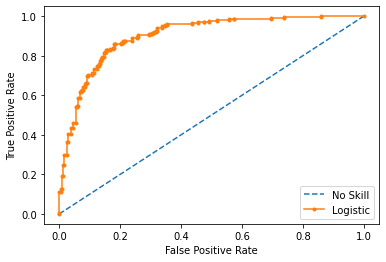

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
#n_features (int), default=20. Look at the documentation https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
print(X.shape)
print(y.shape)
print(y[0:10])
print(X[0,:])

import numpy as np
print(np.min(X))
print(np.max(X))
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred=(lr_probs>0.5)
print('y_pred', y_pred)
from sklearn.metrics import confusion_matrix
matrice=confusion_matrix(testy, y_pred)#despite the fact testy is 0 or 1 and y_pred is True or False, the conversion has been done.
print('matrice', matrice)

y_pred [ True  True False False  True  True False False  True  True False  True
 False  True  True  True False  True False  True  True False False  True
 False  True  True  True False  True  True  True False  True False False
  True  True  True False False False False  True False  True  True  True
 False False False  True  True False False  True False False False  True
  True False  True False False False False False  True  True False False
  True  True  True  True False  True False False False False  True False
  True False  True  True  True  True  True  True  True  True  True  True
 False  True False  True  True False  True False False  True  True False
  True False False  True  True False False  True  True False False  True
 False False False False  True  True  True  True  True  True False  True
 False False False  True False False  True False  True  True  True False
 False False False  True  True False  True False False False  True  True
 False False False  True False  True  True F



---



---



---





**Hyperparameter tuning**

* Linear regression: Choosing parameters
* Ridge/lasso regression: Choosing alpha
* k-Nearest Neighbors: Choosing n_neighbors
* Parameters like alpha and k: Hyperparameters
* Hyperparameters cannot be learned by fitting the model


**Choosing the correct hyperparameter**

* Try a bunch of different hyperparameter values
* Fit all of them separately
* See how well each performs
* Choose the best performing one
* It is essential to use cross-validation

![](https://drive.google.com/uc?export=view&id=1L9-K-1OCgQwLYUJWS-kjq2WgFMhjWSp4)

**GridSearchCV in scikit-learn**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #here we do not specify k
knn_cv = GridSearchCV(knn, param_grid, cv=5)
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)


{'n_neighbors': 32}
0.833


**Appliquer une cross validation à la méthode des k-plus proches voisins avec une recherche des meilleurs paramètres au dataset iris (voir cours précédent).**